In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

## Importing the Dataset & exploring

In [3]:
raw_data = pd.read_csv('amazon_alexa.tsv', delimiter='\t', quoting = 3)

In [4]:
raw_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
raw_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
raw_data['feedback'].unique()

array([1, 0], dtype=int64)

In [8]:
raw_data['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [9]:
raw_data.loc[(raw_data['rating'] == 3) & (raw_data['feedback'] == 1)]

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
24,3,30-Jul-18,Sandstone Fabric,"""I got a second unit for the bedroom, I was ex...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
54,3,30-Jul-18,Sandstone Fabric,like google better,1
...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed with the speaker...,1
3068,3,30-Jul-18,White Dot,I was hoping the cord was white also. Otherwis...,1
3114,3,30-Jul-18,Black Dot,,1
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,1


In [10]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 500)

In [11]:
raw_data['verified_reviews']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                     Love my Echo!
1                                                                                                                                                                                                                                                                                                                                                                                                                                                         Loved it!
2                                                                                               

### Creating a copy of dataset

In [12]:
data = raw_data.copy()

In [13]:
data.compare(raw_data)

Empty DataFrame
Columns: []
Index: []

### Exploring Dataset

In [14]:
# Do we have Null values in dataset

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

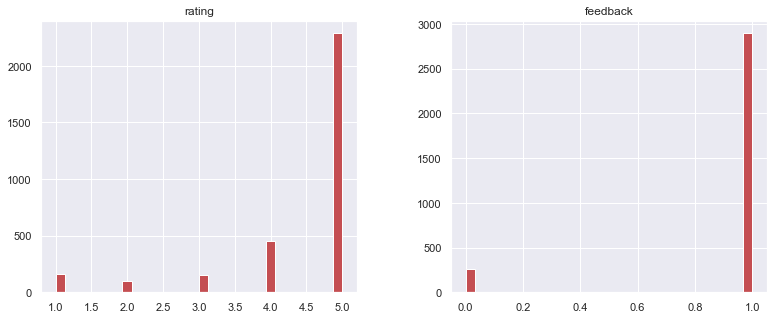

In [16]:
data.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()

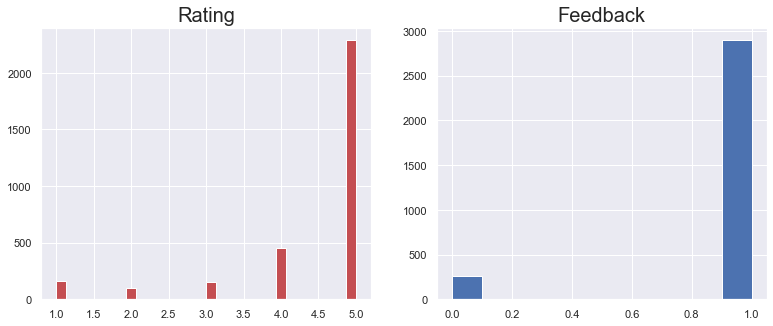

In [17]:
f, ax = plt.subplots(1,2,figsize = (13,5))
# plt.figure()

ax[0].hist(data['rating'], bins = 30, color = 'r')
ax[0].set_title('Rating', fontsize = 20)
ax[1].hist(data['feedback'], color = 'b')
ax[1].set_title('Feedback', fontsize = 20)
plt.show()

In [18]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [19]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

### Including the length into the data

In [20]:
data['length'] = data['verified_reviews'].apply(len)

In [21]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.""",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.""",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [22]:
data.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.673651
std,1.068506,0.273778,182.526953
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,166.000000
max,5.000000,1.000000,2853.000000


In [23]:
data.loc[data['length'] == 1]

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
406,1,16-Jul-18,White,,0,1
524,2,20-Jun-18,White,,0,1
654,5,26-May-18,Black,,1,1
755,5,30-Jul-18,Heather Gray Fabric,😍,1,1
780,5,30-Jul-18,Heather Gray Fabric,,1,1


In [24]:
data['verified_reviews'].loc[data['length'] == 2853].iloc[0]

'"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It\'s no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free P

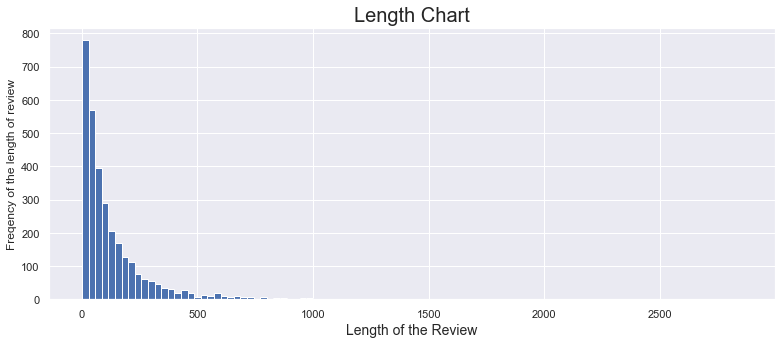

In [25]:
plt.figure(figsize= (13,5))
plt.hist(data['length'], bins = 100)
plt.title('Length Chart', fontsize = 20)
plt.xlabel('Length of the Review', fontsize = 14)
plt.ylabel('Freqency of the length of review', fontsize = 12)
plt.show()

### Negative feedbacks and Positive feedbacks

In [26]:
negative_reviews = data[data['feedback'] == 0]

positive_reviews = data[data['feedback'] == 1]

In [27]:
negative_reviews

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more accurately then Alexa. I don't see a real need for it in my household, though it was a good bargain on prime day deals.""",0,165
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get a bose,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?""",0,89
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
187,2,29-Jul-18,Charcoal Fabric,"""Really disappointed Alexa has to be plug-in to wall socket all the time. My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery. If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.""",0,340
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things,0,114
233,2,29-Jul-18,Sandstone Fabric,"""I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it for that either. She randomly speaks up when nobody is talking to her. Just today I unplugged her...not sure I'll ever use my Alexa again.""",0,309
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out before you can enter the password,0,79
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,22


In [28]:
positive_reviews

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.""",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.""",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in between!!""",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.""",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.""",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.""",1,382


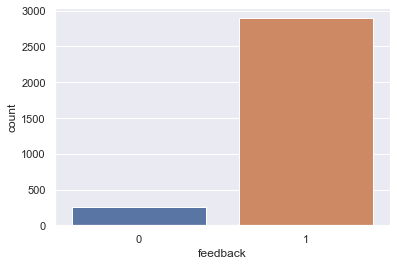

In [29]:
# sns.countplot(data['feedback'])
sns.countplot(x = 'feedback', data = data)
plt.show()

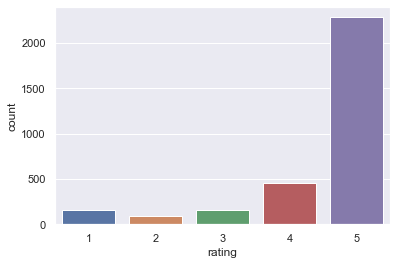

In [30]:
sns.countplot(x = 'rating', data = data)
plt.show()

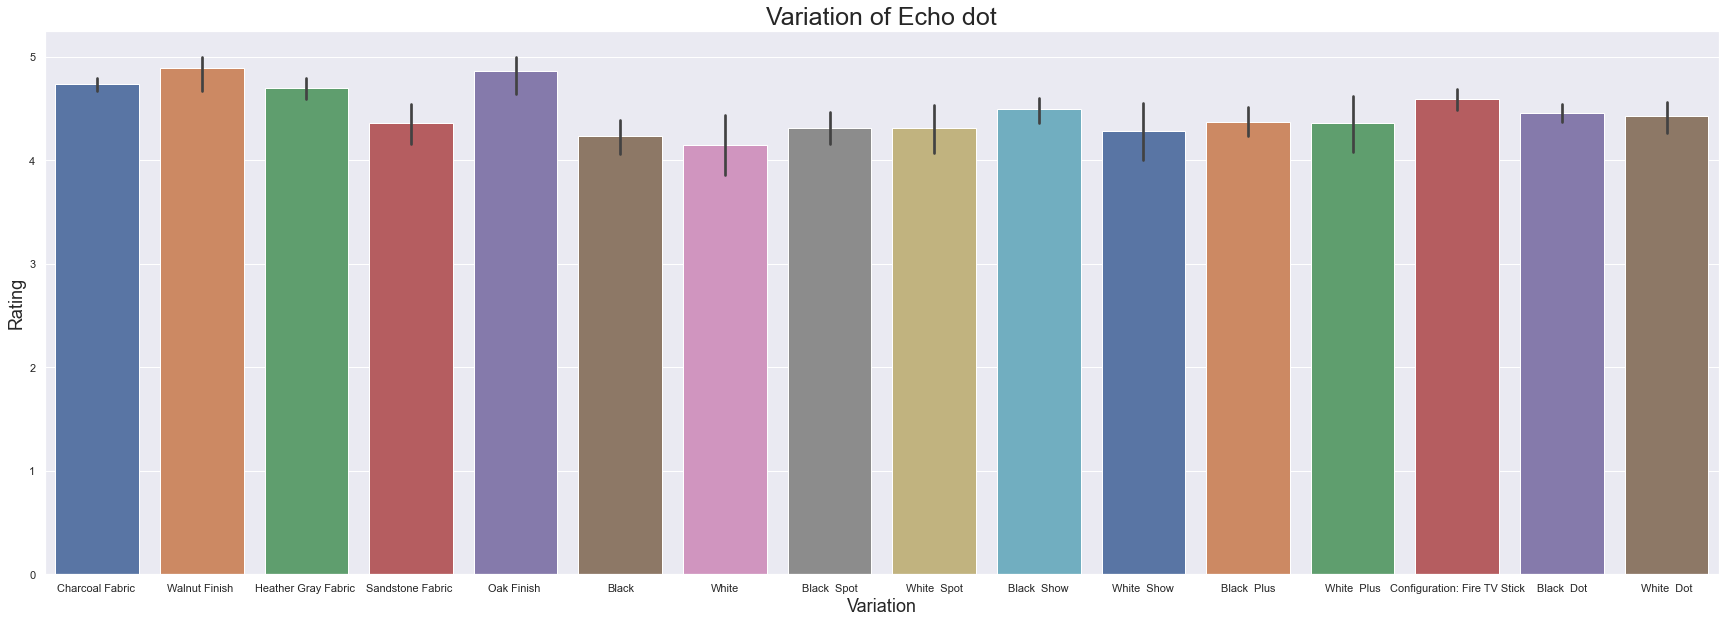

In [31]:
plt.figure(figsize=(30,10))

sns.barplot(x = 'variation', y = 'rating', data = data, palette = 'deep')
plt.title('Variation of Echo dot', fontsize = 25)
plt.xlabel('Variation', fontsize = 18)
plt.ylabel('Rating', fontsize = 18)
plt.show()

#### Checking the bag of words

In [32]:
sentences = data['verified_reviews'].tolist()
print(sentences)

['Love my Echo!', 'Loved it!', '"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."', '"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."', 'Music', '"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do."', '"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet."', "I think this is the 5th one I'v

In [33]:
sentence_one_string = " ".join(sentences)
print(sentence_one_string)

Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I've purchased. I'm workin

In [34]:
# from wordcloud import WordCloud

## Data Cleaning

In [35]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'length'],
      dtype='object')

In [36]:
data.drop(['rating', 'date', 'length'], axis = 1, inplace = True)

In [37]:
data.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"""Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.""",1
3,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.""",1
4,Charcoal Fabric,Music,1


In [38]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [39]:
variation_dummies = pd.get_dummies(data['variation'], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
data.drop(['variation'], axis = 1, inplace = True)

In [41]:
data.head(2)

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1


In [42]:
data = pd.concat([data, variation_dummies], axis = 1)

In [43]:
data.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"""Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.""",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.""",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Removing Stopwords

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
def message_cleaning(message):
    punct_remove = [char for char in message if char not in string.punctuation]
    punct_rem_join = ''.join(punct_remove)
    clean_msg = [word for word in punct_rem_join.split() if word.lower() not in stopwords.words('english')]
    return clean_msg

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [58]:
data_clean = data['verified_reviews'].apply(message_cleaning)

In [59]:
data_clean[0]

['Love', 'Echo']

In [60]:
data_clean

0                                                                                                                                                                                                                                                                                                             [Love, Echo]
1                                                                                                                                                                                                                                                                                                                  [Loved]
2                                                                                                                                                                                          [Sometimes, playing, game, answer, question, correctly, Alexa, says, got, wrong, answers, like, able, turn, lights, away, home]
3                                                      

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(data['verified_reviews'])

In [62]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [63]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
reviews_countvectorizer.shape

(3150, 5211)

In [65]:
data

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"""Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.""",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.""",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"""Perfect for kids, adults and everyone in between!!""",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"""Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.""",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"""I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.""",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,"""Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.""",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
# first let's drop the column
data.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [67]:
# Now let's concatenate them together
data = pd.concat([data, reviews], axis=1)

In [68]:
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,...,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923,4924,4925,4926,4927,4928,4929,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007,5008,5009,5010,5011,5012,5013,5014,5015,5016,5017,5018,5019,5020,5021,5022,5023,5024,5025,5026,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100,5101,5102,5

In [70]:
# Let's drop the target label coloumns
X = data.drop(['feedback'],axis=1)

In [72]:
y = data['feedback']

## Building Models 

### Naive-Bayes

In [74]:
X.shape, y.shape

((3150, 5226), (3150,))

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

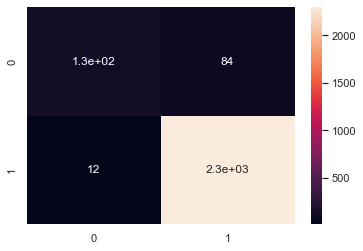

In [78]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

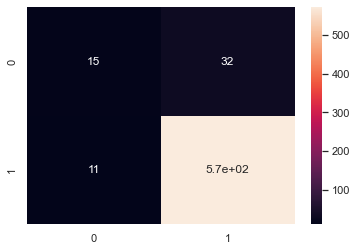

In [79]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [80]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41        47
           1       0.95      0.98      0.96       583

    accuracy                           0.93       630
   macro avg       0.76      0.65      0.69       630
weighted avg       0.92      0.93      0.92       630



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 95.07936507936508 %


<AxesSubplot:>

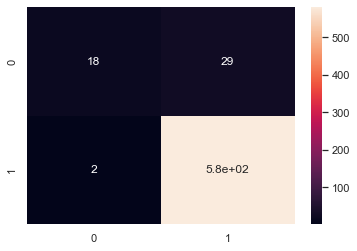

In [85]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [87]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.38      0.90      0.54        20
           1       1.00      0.95      0.97       610

    accuracy                           0.95       630
   macro avg       0.69      0.93      0.76       630
weighted avg       0.98      0.95      0.96       630

